Thomas Koutsidis

In [1]:
import pandas as pd

In [2]:
with open('TrainingDataPositive.txt', 'r') as file:
    positive = file.readlines()
with open('TrainingDataNegative.txt', 'r') as file:
    negative = file.readlines()
with open('testSet.txt', 'r') as file:
    test = file.readlines()
    
# Resources used:   
# https://www.learnbyexample.org/python-open-function/
# https://www.w3schools.com/python/python_file_open.asp

In [3]:
import re
def preProcessFile(text):
    text = text.lower()
    text = re.sub(r"[^\w\s]", "", text)
    text = text.replace('\n', '')
    return text

In [4]:
positive = [preProcessFile(review) for review in positive]
negative = [preProcessFile(review) for review in negative]
test = [preProcessFile(review) for review in test]

In [5]:
pos_reviews = {'review': positive, 'label': 'positive'}
neg_reviews = {'review': negative, 'label': 'negative'}
df = pd.concat([pd.DataFrame(pos_reviews), pd.DataFrame(neg_reviews)], ignore_index = True)

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer

v = TfidfVectorizer(lowercase = True, stop_words = 'english')
X = v.fit_transform(df['review']).toarray()
y = df['label']

# Resources used:
# https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html
# https://enjoymachinelearning.com/blog/countvectorizer-vs-tfidfvectorizer/#:~:text=CountVectorizer%20simply%20counts%20the%20number,is%20to%20the%20whole%20corpus.

# 1.

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [8]:
from sklearn.naive_bayes import GaussianNB

classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [9]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [10]:
X_test_proc = v.transform(test).toarray()
X_test_proc = sc.transform(X_test_proc)
y_pred = classifier.predict(X_test_proc)

In [11]:
print("Prediction results:\n", y_pred)

Prediction results:
 ['positive' 'positive' 'negative' ... 'positive' 'positive' 'positive']


In [12]:
testset = ['positive' if i < 2989 else 'negative' for i in range(len(test))]

In [13]:
from sklearn.metrics import confusion_matrix

cm1 = confusion_matrix(testset, y_pred)
print("Confusion Matrix:\n", cm1)

Confusion Matrix:
 [[ 554  778]
 [ 359 2630]]


In [14]:
from sklearn.metrics import accuracy_score

accuracy1 = accuracy_score(testset, y_pred)
print("Accuracy Score:", accuracy1)

Accuracy Score: 0.7368664660958112


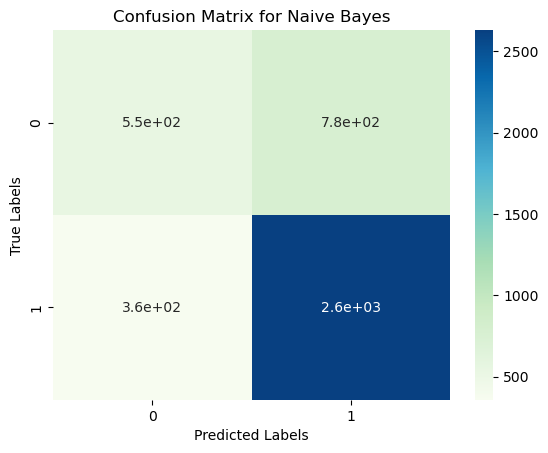

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(cm1, annot = True, cmap = "GnBu")
plt.title('Confusion Matrix for Naive Bayes')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Resources used:
# https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea
# https://matplotlib.org/stable/tutorials/colors/colormaps.html

# 2.

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [17]:
from sklearn.svm import SVC

classifier = SVC(kernel = 'linear')
classifier.fit(X_train, y_train)

SVC(kernel='linear')

In [18]:
y_pred = classifier.predict(X_test_proc)

In [19]:
print("Prediction results:\n", y_pred)

Prediction results:
 ['positive' 'positive' 'positive' ... 'negative' 'negative' 'negative']


In [20]:
cm2 = confusion_matrix(testset, y_pred)
print("Confusion Matrix:\n", cm2)

Confusion Matrix:
 [[1268   64]
 [ 478 2511]]


In [22]:
accuracy2 = accuracy_score(testset, y_pred)
print("Accuracy Score:", accuracy2)

Accuracy Score: 0.8745660726683638


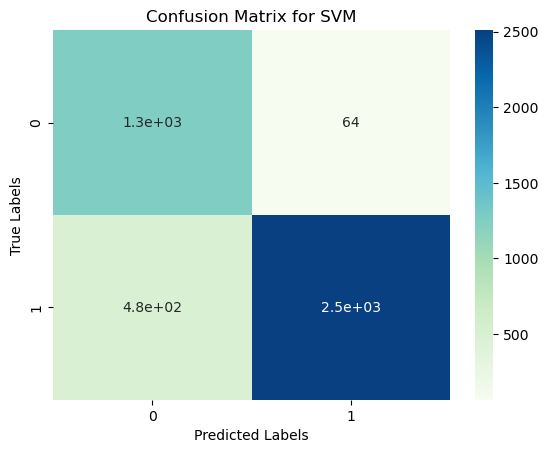

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(cm2, annot = True, cmap = "GnBu")
plt.title('Confusion Matrix for SVM')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# 3. 

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [25]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [26]:
y_pred = classifier.predict(X_test_proc)

In [27]:
print("Prediction results:\n", y_pred)

Prediction results:
 ['positive' 'positive' 'positive' ... 'negative' 'negative' 'negative']


In [29]:
cm3 = confusion_matrix(testset, y_pred)
print("Confusion Matrix:\n", cm3)

Confusion Matrix:
 [[1293   39]
 [ 412 2577]]


In [30]:
accuracy3 = accuracy_score(testset, y_pred)
print("Accuracy Score:", accuracy3)

Accuracy Score: 0.8956260124971072


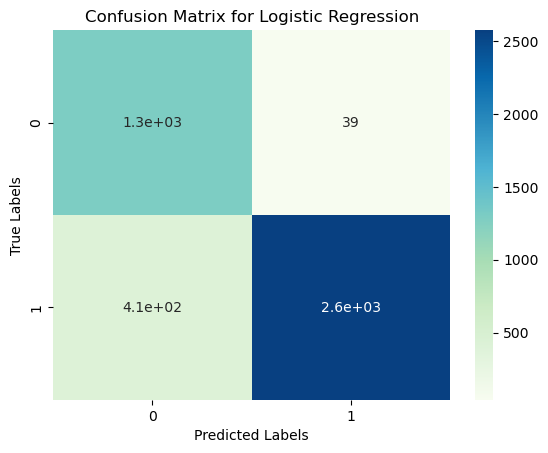

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(cm3, annot = True, cmap = "GnBu")
plt.title('Confusion Matrix for Logistic Regression')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# 4.

In [33]:
print("Accuracy score of Naive Bayes =", accuracy1)
print("Accuracy score of SVM =", accuracy2)
print("Accuracy score of Logisitic Regression =", accuracy3)

Accuracy score of Naive Bayes = 0.7368664660958112
Accuracy score of SVM = 0.8745660726683638
Accuracy score of Logisitic Regression = 0.8956260124971072


In [36]:
print("Conufsion Matrix of Naive Bayes:\n", cm1)
print("Confusion Matrix of SVM:\n", cm2)
print("Confusion Matrix of Logistic Regression:\n", cm3)

Conufsion Matrix of Naive Bayes:
 [[ 554  778]
 [ 359 2630]]
Confusion Matrix of SVM:
 [[1268   64]
 [ 478 2511]]
Confusion Matrix of Logistic Regression:
 [[1293   39]
 [ 412 2577]]


The algorithm above takes the three text files, opens them and then saves them. After doing some data preprocessing, the text in the data is cleaned. The positive and negative reviews are concatenated into dataframe and feature extraction was applied. The training and test datasets are split and model training can begin. First off, Naive Bayes is applied to this. There is some scaling done and then the testSet.txt is used to compare the predicted results to. This is then done for both SVM and Logistic Regression, as well. We evaluated the models using predict and checked for the accuracy scores. Visualizations of the confusion matrixes are created as well to illustrate the data.

Naive Bayes was the least accurate, while Logistic Regression was the most accurate. SVM was in the middle, as the second most accurate. Using the notes and implemented code examples of our modules, I was able to create an algorithm that worked similarly, and gave fairly accurate results. 